In [1]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import stlearn as st

/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Scale step is finished in adata.X


/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


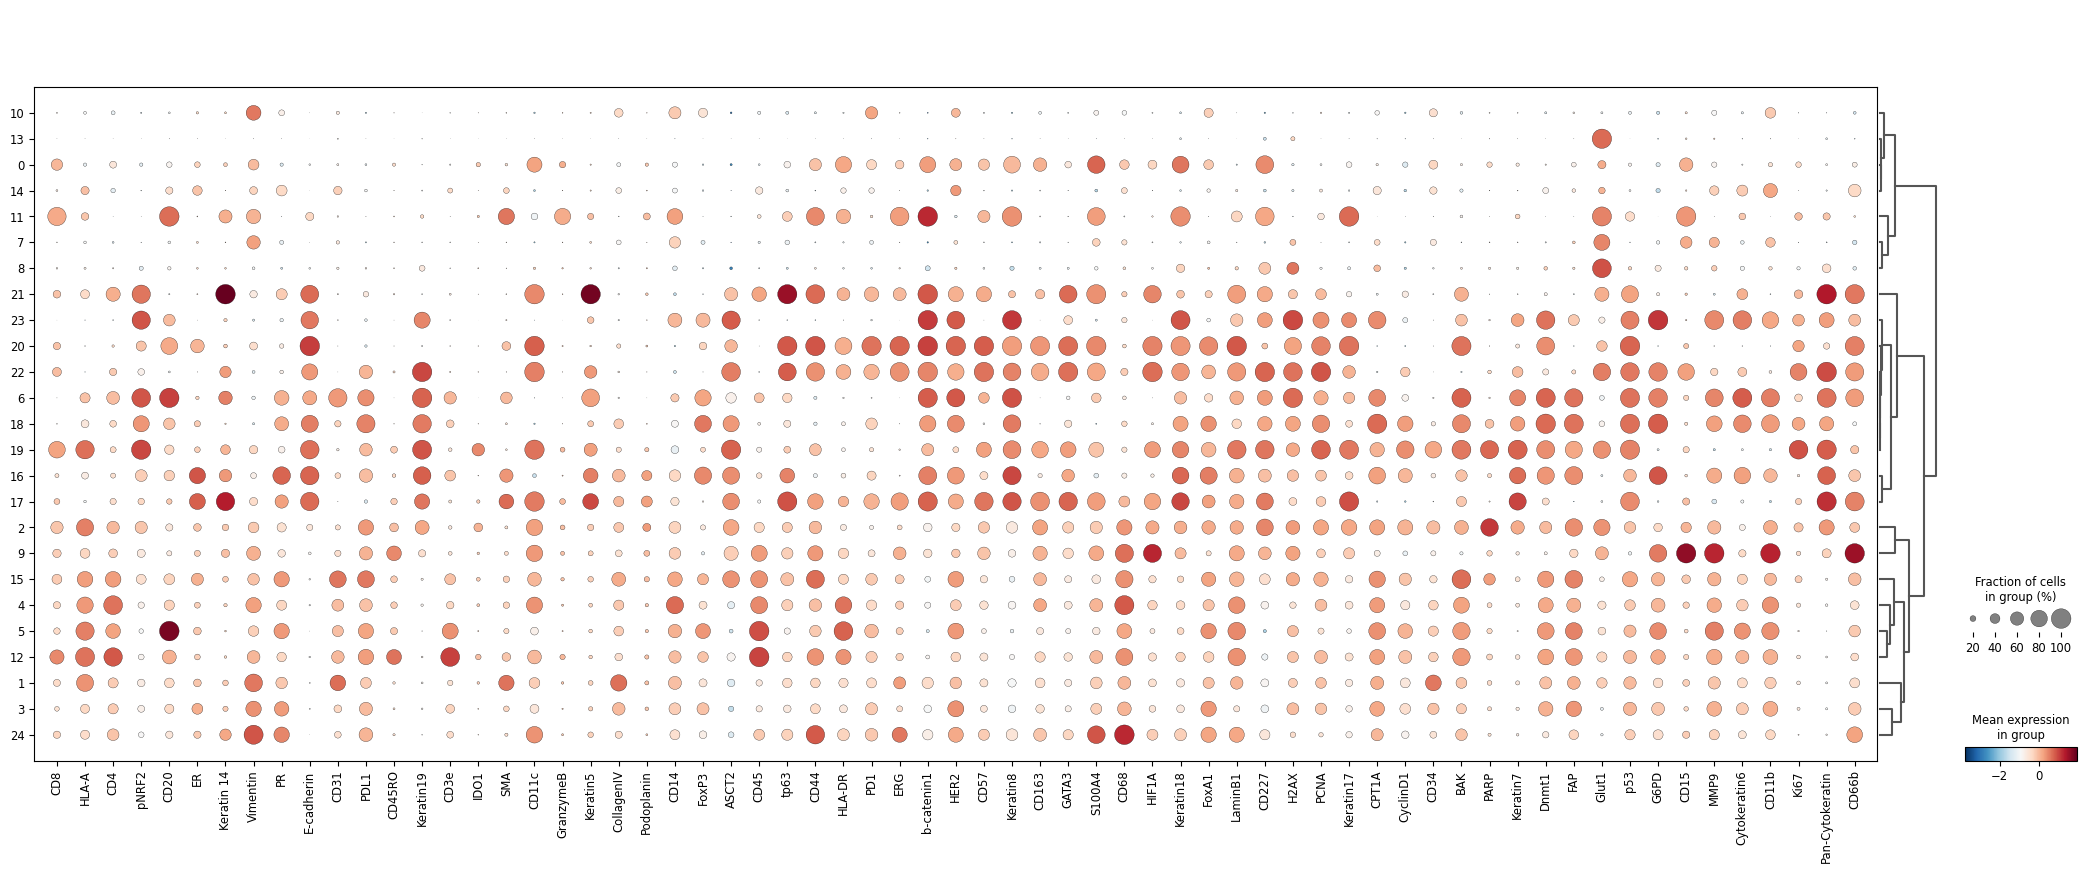

/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/scratch1/miniconda3/envs/rsc_conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWar

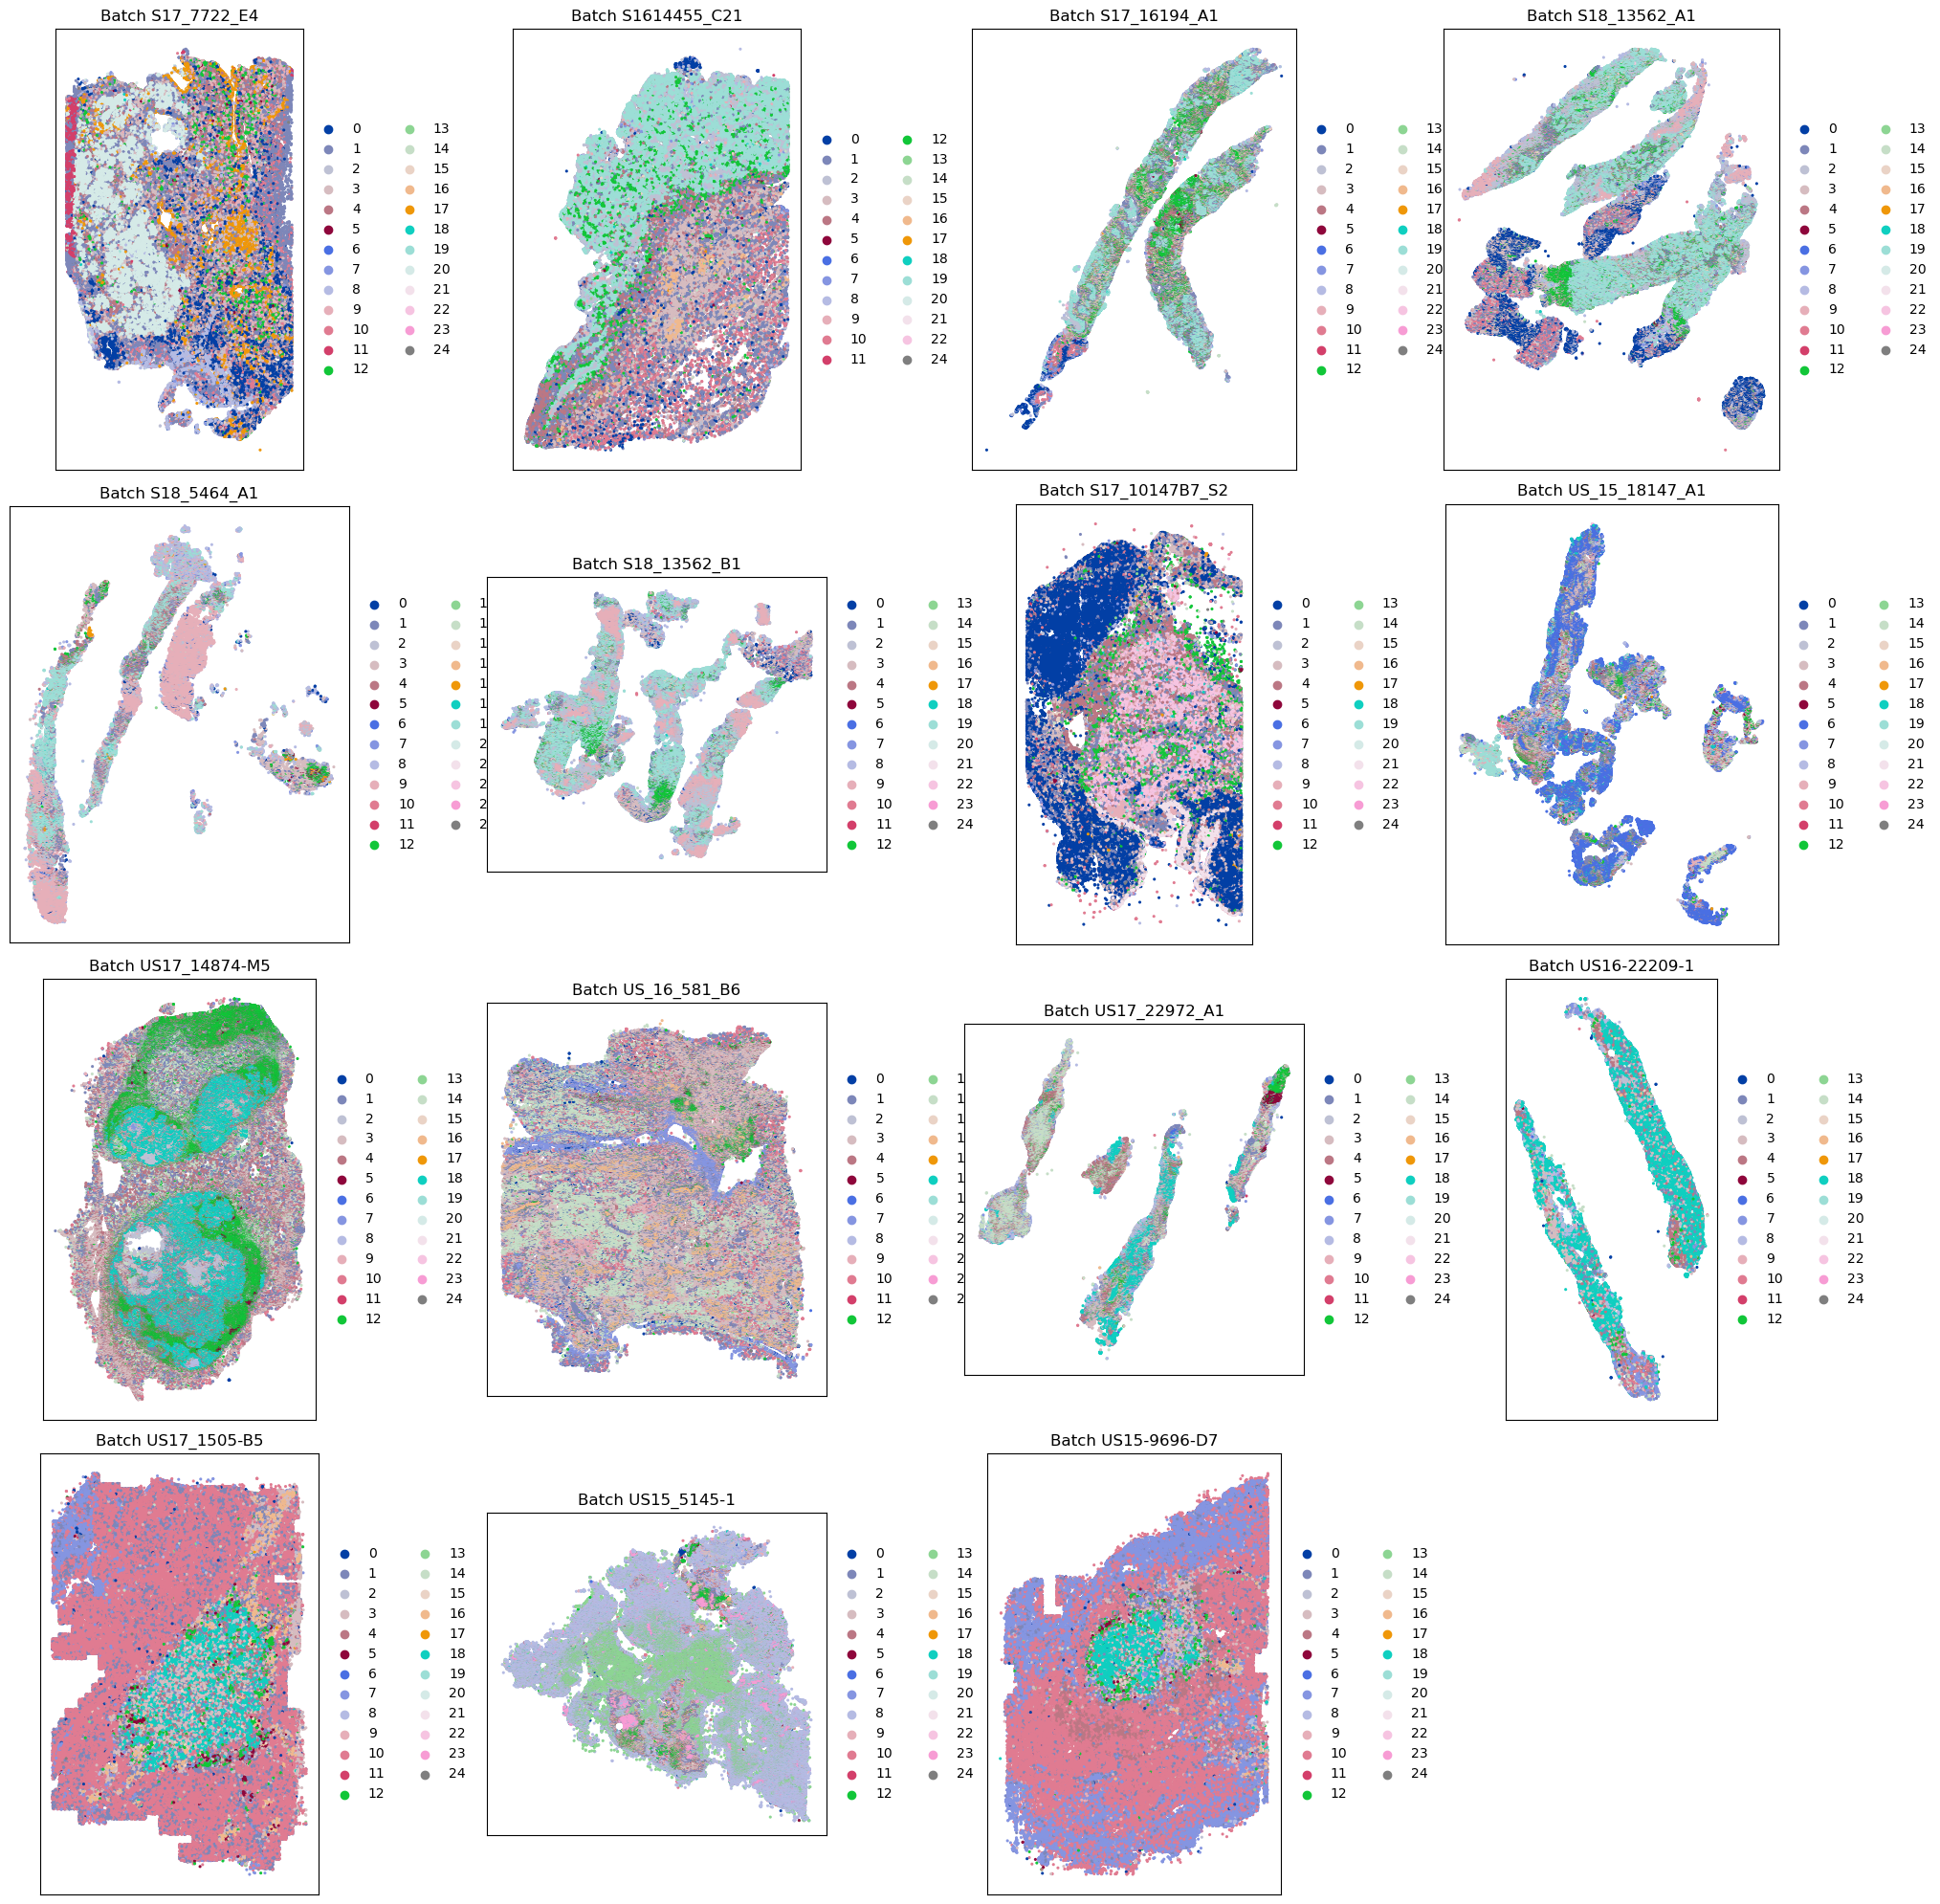

In [4]:
def clusterMap(adata, color='leiden', ax=None):
    sc.pl.embedding(adata, "spatial", color=color, s=20, ax=ax, show=False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')

# conduct clustering and generate dotplot
adata = ad.read_h5ad('adata.h5ad')
st.pp.scale(adata)
sc.pl.dotplot(adata, adata.var_names.to_list(), groupby='leiden', dendrogram=True, log=True, cmap='RdBu_r')

# Get unique batches
batches = adata.obs['batch'].unique()
# Determine the grid size
num_batches = len(batches)
grid_size = (4, 4)  # Adjust this based on the number of batches and your preference
fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(20, 20))
# Loop through the batches and create subplots
for i, batch in enumerate(batches):
    row = i // grid_size[1]
    col = i % grid_size[1]
    ax = axes[row, col]
    clusterMap(adata[adata.obs['batch'] == batch], color='leiden', ax=ax)
    ax.set_title(f'Batch {batch}')
# Turn off axes for any remaining empty subplots
for j in range(num_batches, grid_size[0] * grid_size[1]):
    row = j // grid_size[1]
    col = j % grid_size[1]
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [2]:
adata = ad.read_h5ad('adata.h5ad')
print(type(adata.X))

<class 'scipy.sparse._csr.csr_matrix'>


/home/lzhang36/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1898: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
